Image loaded successfully
Image shape (H, W, C): (159, 318, 3)
Data type: uint8


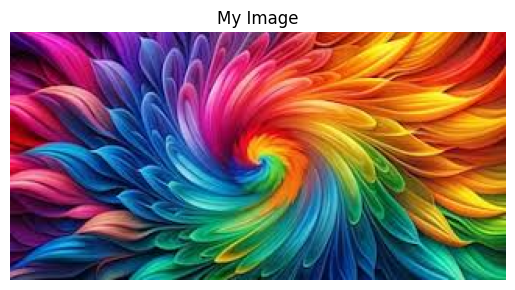

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Path to the image
image_path = "images/colourimg.jpg"

# Load image (BGR by default)
img = cv2.imread(image_path)

# Safety check
if img is None:
    print(f"Error: Could not load image at {image_path}")
    exit(1)

# Print image information
print("Image loaded successfully")
print("Image shape (H, W, C):", img.shape)
print("Data type:", img.dtype)

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("My Image")
plt.axis("off")
plt.show()

# Split channels (still from BGR image)
b_channel, g_channel, r_channel = cv2.split(img)



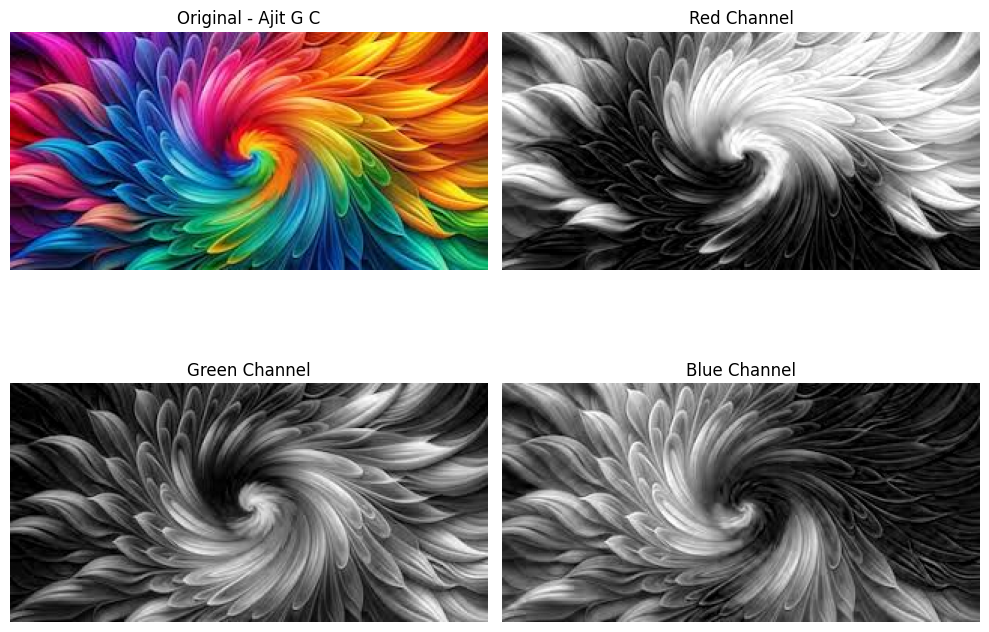

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("images/colourimg.jpg")

if img is None:
    print("Error: Could not load image")
    exit(1)
# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split channels (OpenCV uses BGR)
b, g, r = cv2.split(img)

# Create 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Original image
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Original - Ajit G C")
axs[0, 0].axis("off")

# Red channel
axs[0, 1].imshow(r, cmap="gray")
axs[0, 1].set_title("Red Channel")
axs[0, 1].axis("off")

# Green channel
axs[1, 0].imshow(g, cmap="gray")
axs[1, 0].set_title("Green Channel")
axs[1, 0].axis("off")

# Blue channel
axs[1, 1].imshow(b, cmap="gray")
axs[1, 1].set_title("Blue Channel")
axs[1, 1].axis("off")

plt.tight_layout()
plt.savefig("images/task-a-result.jpg")
plt.show()

In [ ]:
from robodk import robolink

# Connect to RoboDK (RoboDK must be open)
RDK = robolink.Robolink()

# Get the camera by name
cam = RDK.Item('Camera 1')

if not cam.Valid():
    raise Exception("Camera 1 not found")

# Open camera window
cam.setParam('Open', 1)

# Build correct file path (IMPORTANT)
station_path = RDK.getParam('PATH_OPENSTATION')
file = station_path + "/images/robodk_snapshot.png"

# Take snapshot
RDK.Cam2D_Snapshot(file, cam)

print("Snapshot saved at:", file)


Snapshot saved at: /Users/exe/Documents/Machine Vision/images/robodk_snapshot.png


In [ ]:
import cv2

# Load RoboDK snapshot
image_path = "images/robodk_snapshot.png"
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load RoboDK snapshot")
    exit(1)

# Print image shape
print("Image shape (H, W, C):", img.shape)


Image shape (H, W, C): (900, 1440, 3)


In [ ]:
import cv2

# -------------------------------------------------
# Load RoboDK snapshot
# -------------------------------------------------
image_path = "images/robodk_snapshot.png"
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load RoboDK snapshot")
    exit(1)

# Print image information
print("Image shape (H, W, C):", img.shape)

# -------------------------------------------------
# Rectangle 1: Box
# Coordinates from pixel clicks
# Top-left  : (401, 434)
# Bottom-right: (609, 696)
# -------------------------------------------------
cv2.rectangle(img, (401, 434), (609, 696), (255, 0, 0), 2)
cv2.putText(
    img,
    "Box",
    (401, 420),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.7,
    (255, 0, 0),
    2
)

# -------------------------------------------------
# Rectangle 2: Mosaic Tile
# Coordinates from pixel clicks
# Top-left  : (848, 581)
# Bottom-right: (939, 669)
# -------------------------------------------------
cv2.rectangle(img, (848, 581), (939, 669), (0, 255, 0), 2)
cv2.putText(
    img,
    "Mosaic Tile",
    (848, 565),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.7,
    (0, 255, 0),
    2
)

# -------------------------------------------------
# Name and date (MANDATORY)
# -------------------------------------------------
cv2.putText(
    img,
    "Ajit G C - 2026-01-21",
    (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.8,
    (0, 0, 0),
    2
)

# -------------------------------------------------
# Save and display result
# -------------------------------------------------
output_path = "images/robodk_annotated.png"
cv2.imwrite(output_path, img)

print("Annotated image saved at:", output_path)

cv2.imshow("RoboDK Annotation", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()


Image shape (H, W, C): (900, 1440, 3)
Annotated image saved at: images/robodk_annotated.png


: 